#Connect to Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Unzip dataset

In [2]:
!unzip "/content/Images.zip"

Archive:  /content/Images.zip
   creating: Images/
  inflating: __MACOSX/._Images       
  inflating: Images/micrograph1648.png  
  inflating: __MACOSX/Images/._micrograph1648.png  
  inflating: Images/micrograph135.png  
  inflating: __MACOSX/Images/._micrograph135.png  
  inflating: Images/micrograph1716.png  
  inflating: __MACOSX/Images/._micrograph1716.png  
  inflating: Images/micrograph1712.png  
  inflating: __MACOSX/Images/._micrograph1712.png  
  inflating: Images/micrograph1249.png  
  inflating: __MACOSX/Images/._micrograph1249.png  
  inflating: Images/micrograph864.png  
  inflating: __MACOSX/Images/._micrograph864.png  
  inflating: Images/micrograph1159.png  
  inflating: __MACOSX/Images/._micrograph1159.png  
  inflating: Images/micrograph1173.png  
  inflating: __MACOSX/Images/._micrograph1173.png  
  inflating: Images/micrograph1637.png  
  inflating: __MACOSX/Images/._micrograph1637.png  
  inflating: Images/micrograph148.png  
  inflating: __MACOSX/Images/._microgr

In [3]:
!unzip "/content/train_dataset.zip"

Archive:  /content/train_dataset.zip
   creating: train_dataset/
  inflating: __MACOSX/._train_dataset  
   creating: train_dataset/original/
  inflating: __MACOSX/train_dataset/._original  
   creating: train_dataset/mask/
  inflating: __MACOSX/train_dataset/._mask  
  inflating: train_dataset/original/augment_34_#.png  
  inflating: __MACOSX/train_dataset/original/._augment_34_#.png  
  inflating: train_dataset/original/augment_71_#.png  
  inflating: __MACOSX/train_dataset/original/._augment_71_#.png  
  inflating: train_dataset/original/augment_68_#.png  
  inflating: __MACOSX/train_dataset/original/._augment_68_#.png  
  inflating: train_dataset/original/augment_10_#.png  
  inflating: __MACOSX/train_dataset/original/._augment_10_#.png  
  inflating: train_dataset/original/augment_55_#.png  
  inflating: __MACOSX/train_dataset/original/._augment_55_#.png  
  inflating: train_dataset/original/augment_12_#.png  
  inflating: __MACOSX/train_dataset/original/._augment_12_#.png  
  inf

In [4]:
!unzip "/content/val_dataset.zip"


Archive:  /content/val_dataset.zip
   creating: val_dataset/
  inflating: __MACOSX/._val_dataset  
   creating: val_dataset/Original/
  inflating: __MACOSX/val_dataset/._Original  
   creating: val_dataset/mask/
  inflating: __MACOSX/val_dataset/._mask  
  inflating: val_dataset/Original/augment_10_#.png  
  inflating: __MACOSX/val_dataset/Original/._augment_10_#.png  
  inflating: val_dataset/Original/augment_12_#.png  
  inflating: __MACOSX/val_dataset/Original/._augment_12_#.png  
  inflating: val_dataset/Original/augment_8_#.png  
  inflating: __MACOSX/val_dataset/Original/._augment_8_#.png  
  inflating: val_dataset/Original/augment_16_#.png  
  inflating: __MACOSX/val_dataset/Original/._augment_16_#.png  
  inflating: val_dataset/Original/augment_14_#.png  
  inflating: __MACOSX/val_dataset/Original/._augment_14_#.png  
  inflating: val_dataset/Original/augment_13_#.png  
  inflating: __MACOSX/val_dataset/Original/._augment_13_#.png  
  inflating: val_dataset/Original/augment_11_

#Install micronet model from GitHub

In [5]:
!pip install git+https://github.com/nasa/pretrained-microscopy-models

  Cloning https://github.com/nasa/pretrained-microscopy-models to /tmp/pip-req-build-_f3igrvi
  Running command git clone --filter=blob:none --quiet https://github.com/nasa/pretrained-microscopy-models /tmp/pip-req-build-_f3igrvi
  Resolved https://github.com/nasa/pretrained-microscopy-models to commit 4d98e609a3177dadcd9d5d1f12dac59260180dbf
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Essential Libraries

In [6]:
import torch
import pretrained_microscopy_models as pmm
import torch.utils.model_zoo as model_zoo
import os
import segmentation_models_pytorch as smp
import albumentations as albu
import cv2
import matplotlib.pyplot as plt
import numpy as np

#Read train iamges from original directory

In [7]:
name=os.listdir('train_dataset/original')
print(name)
print(len(name))

['augment_28_#.png', 'augment_32_#.png', 'augment_34_#.png', 'augment_36_#.png', 'augment_78_#.png', 'augment_17_#.png', 'augment_22_#.png', 'augment_23_#.png', 'augment_58_#.png', 'augment_72_#.png', 'augment_27_#.png', 'augment_6_#.png', 'augment_13_#.png', 'augment_21_#.png', 'augment_8_#.png', 'augment_77_#.png', 'augment_43_#.png', 'augment_73_#.png', 'augment_29_#.png', 'augment_57_#.png', 'augment_25_#.png', 'augment_11_#.png', 'augment_2_#.png', 'augment_68_#.png', 'augment_10_#.png', 'augment_16_#.png', 'augment_59_#.png', 'augment_60_#.png', 'augment_15_#.png', 'augment_46_#.png', 'augment_65_#.png', 'augment_47_#.png', 'augment_61_#.png', 'augment_31_#.png', 'augment_38_#.png', 'augment_66_#.png', 'augment_64_#.png', 'augment_7_#.png', 'augment_30_#.png', 'augment_48_#.png', 'augment_12_#.png', 'augment_24_#.png', 'augment_9_#.png', 'augment_71_#.png', 'augment_80_#.png', 'augment_19_#.png', 'augment_74_#.png', 'augment_69_#.png', 'augment_37_#.png', 'augment_4_#.png', 'augm

#Basic Preprocessiong
1. shape
2. Normalize
3. reshape (3x3x3 to 3x3x1)

In [8]:
def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')
def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform

    Args:
        preprocessing_fn (callbale): data normalization function
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose

    """

    _transform = [
        albu.Lambda(image=preprocessing_fn),
        albu.Lambda(image=to_tensor, mask=to_tensor),
    ]
    return albu.Compose(_transform)

#Augmentaion

In [9]:

def get_training_augmentation():
    train_transform = [
        albu.Flip(p=0.75),
        albu.RandomRotate90(p=1),
        albu.GaussNoise(p=0.5),

        albu.OneOf(
            [
                albu.CLAHE(p=1),
                albu.RandomBrightness(p=1, limit=0.25),
                albu.RandomGamma(p=1),
            ],
            p=0.50,
        ),

        albu.OneOf(
            [
                albu.Sharpen(p=1),
                albu.Blur(blur_limit=3, p=1),
                #albu.MotionBlur(blur_limit=3, p=1),
            ],
            p=0.50,
        ),

        albu.OneOf(
            [
                albu.RandomContrast(p=1, limit=0.3),
                albu.HueSaturationValue(p=1),
            ],
            p=0.50,
        ),
    ]
    return albu.Compose(train_transform)
def get_validation_augmentation():
    """Add paddings to make image shape divisible by 32"""
    # This is turned off for this dataset
    test_transform = [
        # albu.Resize(256,256, always_apply=True)
    ]
    return albu.Compose(test_transform)

#Preprocessing form micronet website

In [10]:
# how the images will be normalized. Use imagenet statistics even on micronet pre-training
preprocessing_fn = smp.encoders.get_preprocessing_fn('resnet50', 'imagenet')

#Class defination
for more objects
pixel values of the annotations for each mask.
class_values = {'matrix1': [0,0,0], 'matrix2': [6,7,0]}

In [11]:
# pixel values of the annotations for each mask.
class_values = {'matrix': [0,0,0]}

#Dataset reformat as per micronet

In [12]:
training_dataset = pmm.io.Dataset(
    images='train_dataset/original',
    masks='train_dataset/mask',
    class_values=class_values,
    #augmentation=get_training_augmentation(),
    preprocessing=get_preprocessing(preprocessing_fn)
)

#Data visilization after preprocessing in pmm format
img=training_dataset[original][mask]

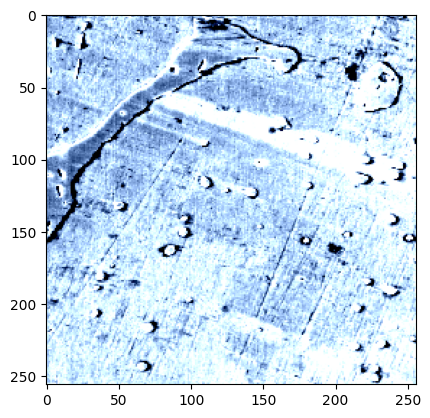

In [13]:
img=training_dataset[0][0]
plt.imshow(np.transpose(img))
# plt.imshow(img)
plt.show()

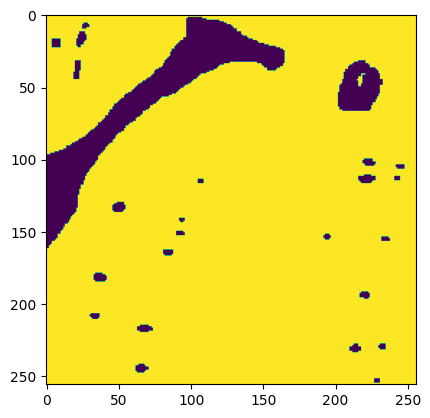

In [29]:
img=training_dataset[0][1]
plt.imshow(np.transpose(img))
# plt.imshow(img)
plt.show()

#Validata data visulisation

In [15]:
validation_dataset = pmm.io.Dataset(
    images='val_dataset/Original',
    masks='val_dataset/mask',
    class_values=class_values,
    # augmentation=get_validation_augmentation(),
    preprocessing=get_preprocessing(preprocessing_fn)
)

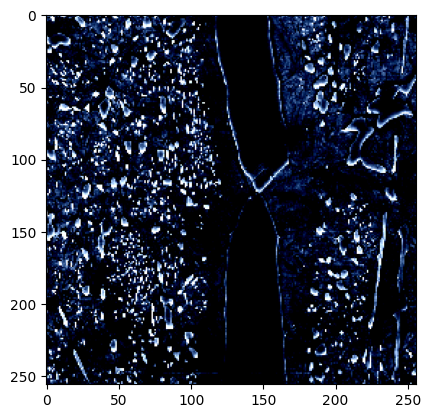

In [16]:
img=validation_dataset[2][0]
# plt.imshow(img)
plt.imshow(np.transpose(img))
plt.show()

#Create Unet Model encoder can be change
classes define number of object. in this case it is = 1 as only one object is segmented

In [17]:
# setup a UNet model with a ResNet50 backbone.
model = pmm.segmentation_training.create_segmentation_model(architecture='Unet', encoder='resnet50', encoder_weights='micronet', classes=1)

Downloading: "https://nasa-public-data.s3.amazonaws.com/microscopy_segmentation_models/resnet50_pretrained_microscopynet_v1.1.pth.tar" to /root/.cache/torch/hub/checkpoints/resnet50_pretrained_microscopynet_v1.1.pth.tar
100%|██████████| 97.8M/97.8M [00:02<00:00, 36.0MB/s]


training Unet

In [30]:
state = pmm.segmentation_training.train_segmentation_model(
    model=model,
    architecture='Unet',
    encoder='resnet50',
    train_dataset=training_dataset,
    validation_dataset=validation_dataset,
    class_values=class_values,
    patience=5,
    lr=2e-3,
    batch_size=8,
    val_batch_size=8,
    save_folder='/content/saved_model',
    save_name='micronet_resnet50_steel_dataset.pth.tar',

)


Epoch: 0, lr: 0.00200000, time: 0.00 seconds, patience step: 0, best iou: 0.0000
valid: 100%|██████████| 3/3 [00:00<00:00,  8.81it/s, DiceBCELoss - 0.3893, iou_score - 0.8371]
Best model saved!

Epoch: 1, lr: 0.00200000, time: 5.71 seconds, patience step: 0, best iou: 0.8371
valid: 100%|██████████| 3/3 [00:00<00:00, 10.99it/s, DiceBCELoss - 0.3851, iou_score - 0.8565]
Best model saved!

Epoch: 2, lr: 0.00200000, time: 8.73 seconds, patience step: 0, best iou: 0.8565
valid: 100%|██████████| 3/3 [00:00<00:00,  5.38it/s, DiceBCELoss - 0.3836, iou_score - 0.8626]
Best model saved!

Epoch: 3, lr: 0.00200000, time: 7.52 seconds, patience step: 0, best iou: 0.8626
valid: 100%|██████████| 3/3 [00:00<00:00, 10.96it/s, DiceBCELoss - 0.3816, iou_score - 0.858]

Epoch: 4, lr: 0.00200000, time: 3.81 seconds, patience step: 1, best iou: 0.8626
valid: 100%|██████████| 3/3 [00:00<00:00, 10.46it/s, DiceBCELoss - 0.385, iou_score - 0.8585]

Epoch: 5, lr: 0.00200000, time: 3.83 seconds, patience step: 2

#Model savng in pkl form
#for reuse comment dump and uncomment load

In [20]:
# Save the model state dictionary
torch.save(model.state_dict(), '/content/saved_model/micronet_resnet50_steel_dataset.pth')

# Save any metadata
import pickle
with open('/content/saved_model/model_metadata.pkl', 'wb') as f:
    pickle.dump(class_values, f)
    # Add any other metadata you want to save

In [ ]:
import pickle
pickle.dump(model,open('/content/downloaded_pickle.pkl','wb'))
#for reuse comment dump and uncomment load
#model=pickle.load(open('/content/drive/MyDrive/Research Work/Mayank_pdeu_minro_project/save_model/micronet_model_steel_segmentation.pkl','rb'))

#Testing

In [21]:
test_name=os.listdir('Images')

In [26]:
preprocessing_transform = get_preprocessing(preprocessing_fn)

<ipython-input-28-f46e0587c2fe>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


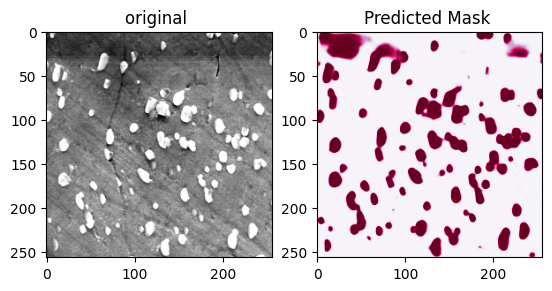

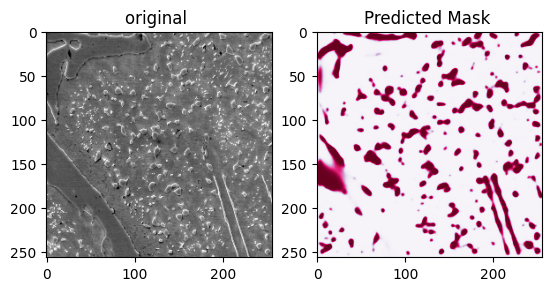

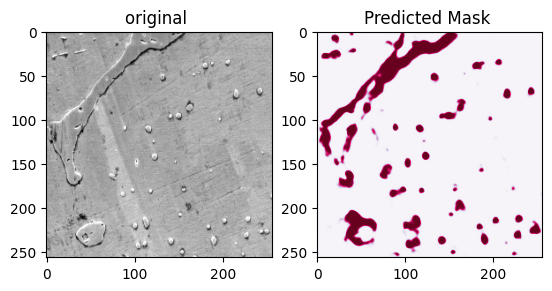

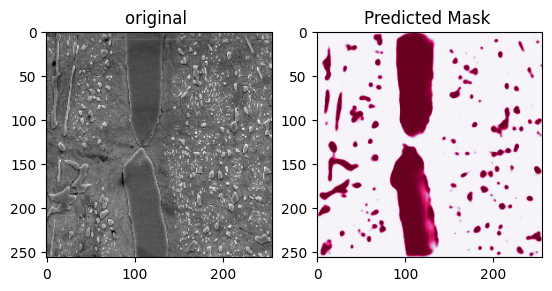

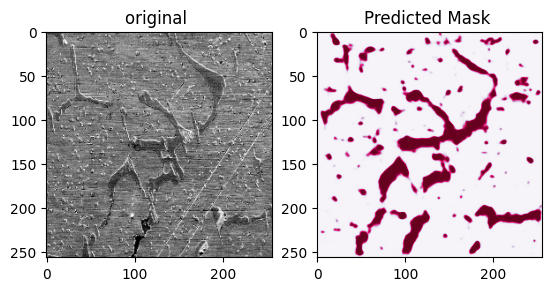

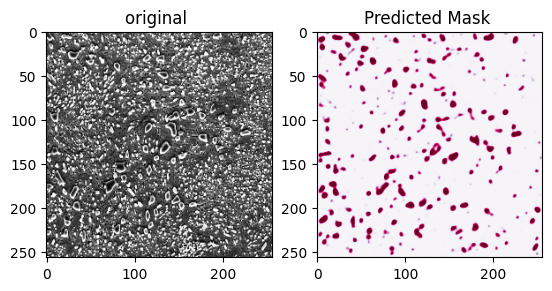

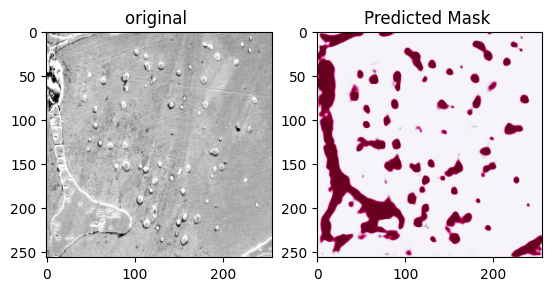

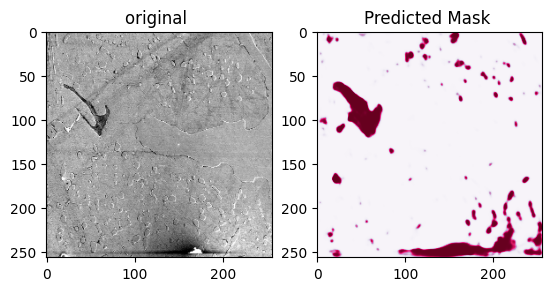

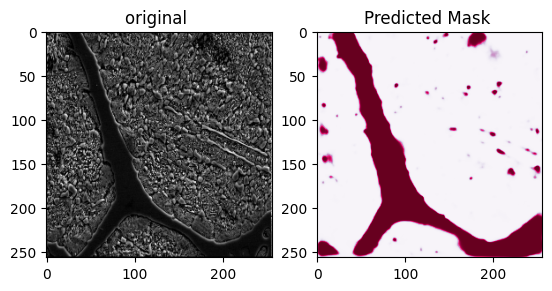

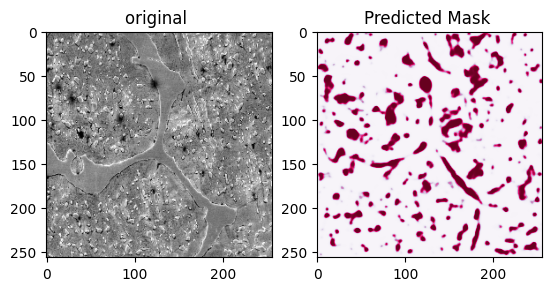

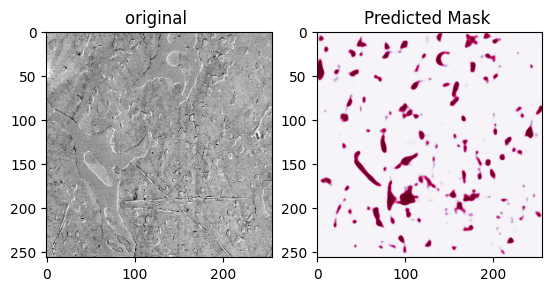

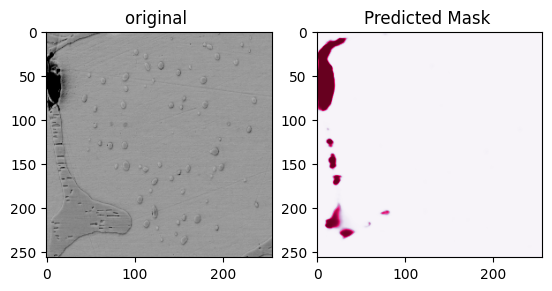

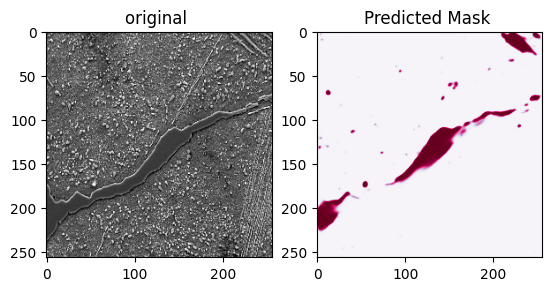

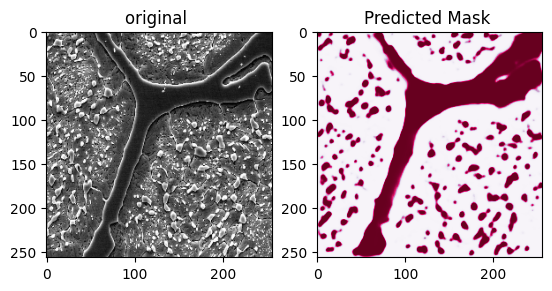

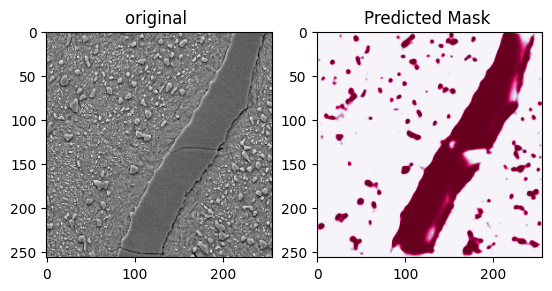

In [28]:
for i in test_name:
  temp=cv2.imread("/content/Images/"+i)
  temp=cv2.resize(temp,(256,256))
  img=preprocessing_transform(image=temp)
  x_tensor = torch.from_numpy(img['image']).to('cuda').unsqueeze(0)
  predict=model.predict(x_tensor)
  numpy_image = predict[0].to('cpu').numpy()
  numpy_image = numpy_image.transpose(1, 2, 0)
  plt.imshow(np.transpose(torch.from_numpy(img['image'])))
  plt.subplot(1,2,1)
  plt.imshow(temp)
  plt.title('original ')
  plt.subplot(1,2,2)
  plt.title('Predicted Mask ')
  plt.imshow(numpy_image, cmap = 'PuRd_r')
  plt.show()